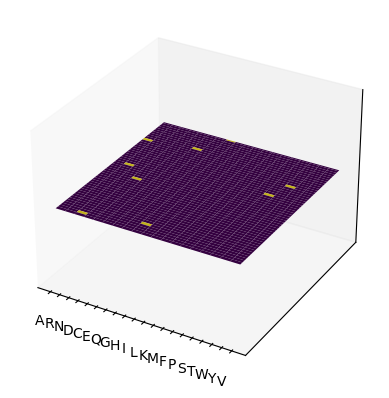

In [62]:
import numpy as np
import matplotlib.pyplot as plt


# Amino acid identities
amino_acids = ["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I",
               "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]


# Set up the 3D plot
fig = plt.figure()
ax = plt.axes(projection="3d")

# Generate data with 20 rows (amino acids) along the x-axis
amino_acid_count = 20
ny = 100  # Keep the y-axis density
x = np.linspace(-1, 1, amino_acid_count)
y = np.linspace(-1, 1, ny)
xv, yv = np.meshgrid(x, y)

# Reshape for plotting
xyz = np.zeros((3, amino_acid_count * ny))
xyz[0] = xv.reshape(amino_acid_count * ny)
xyz[1] = yv.reshape(amino_acid_count * ny)
xyz[2] = np.exp(-(xyz[0]**2 + xyz[1]**2))

# Create a surface plot with contour coloring
# trisurf = ax.plot_trisurf(xyz[0], xyz[1], xyz[2], cmap='OrRd', edgecolor='none')

# Add color bar for reference
# fig.colorbar(trisurf, ax=ax, shrink=0.5, aspect=5)

# Create the one-hot encoding grid on the xy plane with scrambled columns
one_hot_grid = np.zeros_like(xv)
for i in range(amino_acid_count):
    col = np.random.choice(ny)
    one_hot_grid[col, i] = 1  # Set a random column to 1 for each row

# Map the one-hot encoding to colors
colors = plt.cm.viridis(one_hot_grid)

# Plot the grid on the xy plane
ax.plot_surface(xv, yv, np.zeros_like(xv), facecolors=colors, edgecolor='none')

# Set the tick labels for the x-axis
ax.set_xticks(np.linspace(-1, 1, amino_acid_count))
ax.set_xticklabels(amino_acids, fontsize=10) #20, rotation=45)


# Remove the axis and ticks
ax.set_yticks([])
ax.set_zticks([])
# ax.set_axis_off()
# Hide the y and z axes
ax.yaxis.set_visible(False)
ax.zaxis.set_visible(False)

# Make background transparent and remove the grid
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
ax.grid(False)  # Remove the background grid



# Show the plot
plt.show()


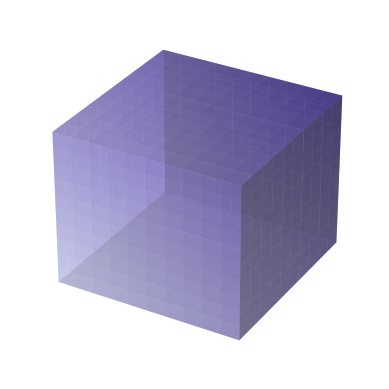

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the size of the cube
n = 10  # This defines the resolution of the cube

# Create a 3D grid
x, y, z = np.indices((n, n, n))

# Define the cube region
cube = (x < n) & (y < n) & (z < n)

# Generate continuous shades of blue with slight transparency
colors = np.empty(cube.shape + (4,), dtype=np.float32)
for i in range(n):
    for j in range(n):
        for k in range(n):
            # Interpolating shades of blue
            # Lighter blue is (0.8, 0.8, 1, 0.5) and darker blue is (0.1, 0, 0.6, 0.5)
            t = (i + j + k) / (3 * (n - 1))  # Normalized distance
            light_blue = np.array([0.8, 0.8, 1])
            dark_blue = np.array([0.1, 0, 0.6])
            color = (1 - t) * light_blue + t * dark_blue
            colors[i, j, k] = [color[0], color[1], color[2], 0.5]  # RGBA values with alpha = 0.5 for slight transparency

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the background to be transparent
fig.patch.set_alpha(0)

# Plot the voxels without edges
ax.voxels(cube, facecolors=colors, edgecolor=None)

# Remove the background grid and axis
ax.set_axis_off()

plt.show()


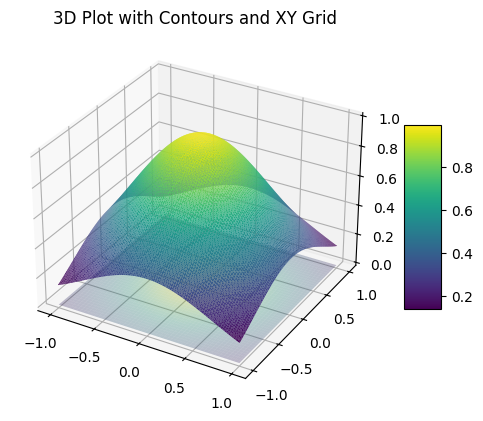

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the 3D plot
fig = plt.figure()
ax = plt.axes(projection="3d")

# Generate data
mesh_size = 100
max_points = mesh_size ** 2
xyz = np.zeros((3, max_points))
nx, ny = (mesh_size, mesh_size)
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
xv, yv = np.meshgrid(x, y)
xyz[0] = xv.reshape(max_points)
xyz[1] = yv.reshape(max_points)
xyz[2] = np.exp(-(xyz[0]**2 + xyz[1]**2))

# Create a surface plot with contour coloring
trisurf = ax.plot_trisurf(xyz[0], xyz[1], xyz[2], cmap='viridis', edgecolor='none')

# Add color bar for reference
fig.colorbar(trisurf, ax=ax, shrink=0.5, aspect=5)

# Create a grid on the xy plane with a continuous gradient
z_plane = np.zeros_like(xv)
colors = plt.cm.viridis(np.exp(-(xv**2 + yv**2)))

ax.plot_surface(xv, yv, z_plane, facecolors=colors, edgecolor='none', alpha=0.3)

# Set plot title
ax.set_title("3D Plot with Contours and XY Grid")

# Make background transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Show the plot
plt.show()
